In [95]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats

In [96]:
# [edge, 1pod_mec, 2pod_mec, 3pod_mec, 4pod_mec, 5pod_mec]
# mean
mean_time_null_to_cold = []  #khởi tạo là null to warm disk nhưng hiện tại đang import data của null to cold, sau nhớ sửa
mean_time_null_to_warm_disk = []
mean_time_warm_disk_to_warm_cpu = []
mean_time_warm_cpu_to_active = []
# std
std_time_null_to_cold = []
std_time_null_to_warm_disk = []
std_time_warm_disk_to_warm_cpu = []
std_time_warm_cpu_to_active = []

# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval


In [97]:
average_time_null_to_warm_disk = [] 

for j in range(1, 10):
    file_name = "../../Measurements/Lifecycle/4G/timestamp/jetson/warm/time_arm_pod_1_rep_"+str(j)+"_782023_16h39.csv"
    #PROCESS
    time_null_to_warm_disk = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == "cold_to_warm_disk":
                time_null_to_warm_disk.append(float(row[1]))
        average_time_null_to_warm_disk.append(time_null_to_warm_disk[-1]-time_null_to_warm_disk[0])
mean_time_null_to_warm_disk.append(np.mean(average_time_null_to_warm_disk))
std_time_null_to_warm_disk.append(np.std(average_time_null_to_warm_disk)/np.sqrt(len(average_time_null_to_warm_disk)))



average_time_null_to_warm_disk = [] 

for i in range(1,6):
    average_time = [] 
    for j in range(1, 11):
        file_name = glob.glob("../../Measurements/Lifecycle/4G/timestamp/mec/warm/time_x86_pod_"+str(i)+"_rep_"+str(j)+"_*")
        if len(file_name) == 0:
            continue
        file_name = file_name[0]
        time_null_to_warm_disk = []
        with open(file_name, newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for row in spamreader:
                if row[2] == "cold_to_warm_disk":
                    time_null_to_warm_disk.append(float(row[1]))
        average_time_null_to_warm_disk.append(time_null_to_warm_disk[-1]-time_null_to_warm_disk[0])
    mean_time_null_to_warm_disk.append(np.mean(average_time_null_to_warm_disk))
    std_time_null_to_warm_disk.append(np.std(average_time_null_to_warm_disk)/np.sqrt(len(average_time_null_to_warm_disk)))
print(mean_time_null_to_warm_disk)

[431.9240096675025, 83.45328660011292, 85.60340188741684, 90.71115595499674, 92.20785484558496, 94.23538124318026]


In [98]:
average_time_null_to_cold = [] 
average_time_warm_disk_to_warm_cpu_process = []


for j in range(1, 11):
    file_name = "../../Measurements/Lifecycle/4G/timestamp/jetson/time_arm_pod_1_rep_"+str(j)+"_18_7_2023_12h45.csv"
    #PROCESS
    time_null_to_cold = []
    time_warm_disk_to_warm_cpu_process = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == "null_to_cold_process":
                time_null_to_cold.append(float(row[1]))
            if row[2] == "warm_disk_to_warm_CPU_process":
                time_warm_disk_to_warm_cpu_process.append(float(row[1]))

        average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
        average_time_null_to_cold.append(time_null_to_cold[-1]-time_null_to_cold[0])
mean_time_null_to_cold.append(np.mean(average_time_null_to_cold))
std_time_null_to_cold.append(np.std(average_time_null_to_cold)/np.sqrt(len(average_time_null_to_cold)))
mean_time_warm_disk_to_warm_cpu.append(np.mean(average_time_warm_disk_to_warm_cpu_process))
std_time_warm_disk_to_warm_cpu.append(np.std(average_time_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_time_warm_disk_to_warm_cpu_process)))


average_time_null_to_cold = [] 
average_time_warm_disk_to_warm_cpu_process = []

for i in range(1,6):
    average_time = [] 
    for j in range(1, 11):
        file_name_list = glob.glob("../../Measurements/Lifecycle/4G/timestamp/mec/time_x86_pod_"+str(i)+"_rep_"+str(j)+"_*")
        for file_name in file_name_list:
            time_warm_disk_to_warm_cpu_process = []
            time_null_to_cold = []
            with open(file_name, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[2] == "null_to_cold_process":
                        time_null_to_cold.append(float(row[1]))
                    if row[2] == "warm_disk_to_warm_CPU_process":
                        time_warm_disk_to_warm_cpu_process.append(float(row[1]))
                average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
                average_time_null_to_cold.append(time_null_to_cold[-1]-time_null_to_cold[0])
    mean_time_null_to_cold.append(np.mean(average_time_null_to_cold))
    std_time_null_to_cold.append(np.std(average_time_null_to_cold)/np.sqrt(len(average_time_null_to_cold)))
    mean_time_warm_disk_to_warm_cpu.append(np.mean(average_time_warm_disk_to_warm_cpu_process))
    std_time_warm_disk_to_warm_cpu.append(np.std(average_time_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_time_warm_disk_to_warm_cpu_process)))

In [99]:
average_time_warm_disk_to_active = []
for j in range(1, 2):
    file_name = "../../Measurements/Curl/4G/jetson/arm_pod_1_rep_1_29_7_2023_11h28.csv"
    #PROCESS
    time_warm_disk_to_active = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[7] == "warm_cpu_to_active_process":
                time_warm_disk_to_active.append(float(row[6]))
        average_time_warm_disk_to_active.append(time_warm_disk_to_active)
mean_time_warm_cpu_to_active.append(np.mean(average_time_warm_disk_to_active))
std_time_warm_cpu_to_active.append(np.std(average_time_warm_disk_to_active)/np.sqrt(len(average_time_warm_disk_to_active)))


print(mean_time_warm_cpu_to_active)

average_time_warm_disk_to_active = []
for i in range(1,6):
    average_time = [] 
    file_name = "../../Measurements/Curl/4G/mec/x86_pod_"+str(i)+"_rep_1_27_7_2023_17h29.csv"
    time_warm_disk_to_active = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[7] == "warm_cpu_to_active_process":
                time_warm_disk_to_active.append(float(row[6]))
        average_time_warm_disk_to_active.append(time_warm_disk_to_active)
    mean_time_warm_cpu_to_active.append(np.mean(time_warm_disk_to_active))
    std_time_warm_cpu_to_active.append(np.std(time_warm_disk_to_active)/np.sqrt(len(time_warm_disk_to_active)))

print(mean_time_warm_cpu_to_active)

[0.14013042]
[0.14013042, 0.1132546, 0.11818780499999999, 0.12084197666666668, 0.12068950249999999, 0.11987682]


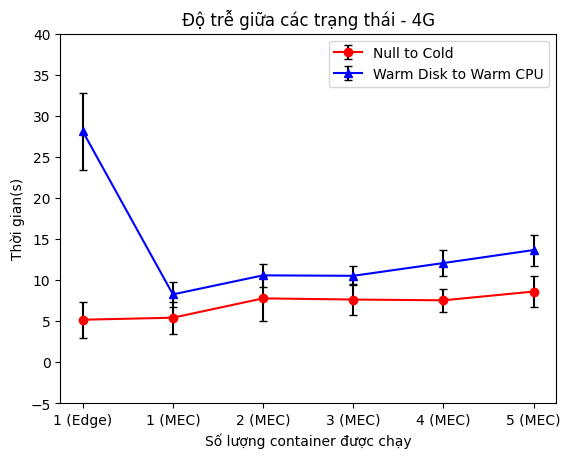

In [100]:
# data
data_null_to_cold = mean_time_null_to_cold
data_null_to_warm_disk = mean_time_null_to_warm_disk
data_warm_disk_to_warm_cpu = mean_time_warm_disk_to_warm_cpu
data_warm_cpu_to_active = mean_time_warm_cpu_to_active
data_cold_to_warm_disk = [x - y - z for x, y, z in zip(data_null_to_warm_disk, data_null_to_cold, data_warm_disk_to_warm_cpu)]

error_null_to_cold = [value*z_value for value in std_time_null_to_cold]
error_null_to_warm_disk = [value*z_value for value in std_time_null_to_warm_disk]
error_warm_disk_to_warm_cpu = [value*z_value for value in std_time_warm_disk_to_warm_cpu]
error_warm_cpu_to_active = [value*z_value for value in std_time_warm_cpu_to_active]
# print(error_null_to_warm_disk)

pod = ['1 (Edge)', '1 (MEC)', '2 (MEC)', '3 (MEC)', '4 (MEC)', '5 (MEC)']

# plot.plot(pod, data_null_to_cold, color = 'r', label = 'Null to Cold', marker='o' )
# plot.plot(pod, data_cold_to_warm_disk, color = 'c', label = 'Null to Warm Disk', marker='>')
# plot.plot(pod, data_warm_disk_to_warm_cpu, color = 'b', label = 'Warm Disk to Warm CPU',  marker='<')
# plot.plot(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active',  marker='^')

plot.errorbar(pod, data_null_to_cold, color = 'r', label = 'Null to Cold', yerr=error_null_to_cold, marker='o', ecolor='black', capsize=3 )
# plot.errorbar(pod, data_cold_to_warm_disk, color = 'm', label = 'Cold to Warm Disk', yerr=error_null_to_warm_disk, alpha=0.9, ecolor='cyan' )
plot.errorbar(pod, data_warm_disk_to_warm_cpu, color = 'b', label = 'Warm Disk to Warm CPU', yerr=error_warm_disk_to_warm_cpu, marker='^', ecolor='black', capsize=3)
# plot.errorbar(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active', yerr=error_warm_cpu_to_active, alpha=0.9, ecolor='black', capsize=3)

# Set the y-axis range
y_min = -5  # Minimum y-axis value
y_max = 40  # Maximum y-axis value
plot.ylim(y_min, y_max)

plot.ylabel('Thời gian(s)')
plot.xlabel("Số lượng container được chạy", fontsize = 10)
plot.title("Độ trễ giữa các trạng thái - 4G") 
# plot.savefig('/home/core/datn/pdf/hieunang.png', bbox_inches='tight')
# plot.yscale('log', base = 2)
plot.legend(loc="best")
plot.show()

In [101]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats
# [edge, 1pod_mec, 2pod_mec, 3pod_mec, 4pod_mec, 5pod_mec]
# mean
mean_time_null_to_cold = []  #khởi tạo là null to warm disk nhưng hiện tại đang import data của null to cold, sau nhớ sửa
mean_time_null_to_warm_disk_jetson = []
mean_time_null_to_warm_disk_mec = []
mean_time_warm_disk_to_warm_cpu = []
mean_time_warm_cpu_to_active = []
# std
std_time_null_to_cold = []
std_time_null_to_warm_disk_jetson = []
std_time_null_to_warm_disk_mec = []
std_time_warm_disk_to_warm_cpu = []
std_time_warm_cpu_to_active = []

networks = ['3G', '4G', 'wifi']
# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval

In [102]:
# NUll --> Cold 
for net in networks:
    average_time_null_to_cold = [] 
    average_time_warm_disk_to_warm_cpu_process = []
    for j in range(1, 11):
        file_name = glob.glob("../../Measurements/Lifecycle/" + net + "/timestamp/jetson/time_arm_pod_1_rep_"+str(j)+"_*")
        #PROCESS
        for file in file_name:
            # print(file)
            time_null_to_cold = []
            time_warm_disk_to_warm_cpu_process = []
            with open(file, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[2] == "null_to_cold_process":
                        time_null_to_cold.append(float(row[1]))
                    if row[2] == "warm_disk_to_warm_CPU_process":
                        time_warm_disk_to_warm_cpu_process.append(float(row[1]))
                average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
                average_time_null_to_cold.append(time_null_to_cold[-1]-time_null_to_cold[0])
    mean_time_null_to_cold.append(np.mean(average_time_null_to_cold))
    std_time_null_to_cold.append(np.std(average_time_null_to_cold))
    mean_time_warm_disk_to_warm_cpu.append(np.mean(average_time_warm_disk_to_warm_cpu_process))
    std_time_warm_disk_to_warm_cpu.append(np.std(average_time_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_time_warm_disk_to_warm_cpu_process)))

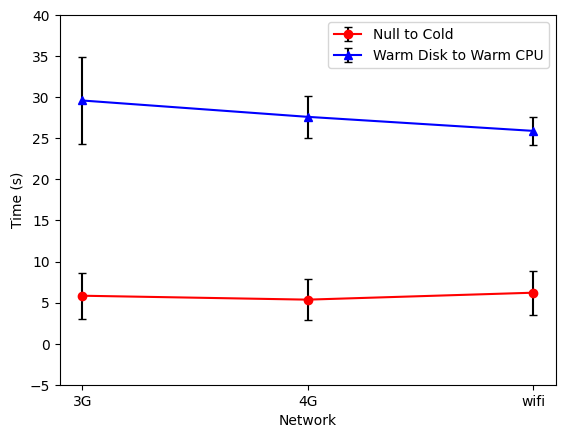

In [103]:
# data
data_null_to_cold = mean_time_null_to_cold
data_warm_disk_to_warm_cpu = mean_time_warm_disk_to_warm_cpu

error_null_to_cold = [value*z_value-3 for value in std_time_null_to_cold]
error_null_to_cold[1]-=0.5
error_null_to_cold[2]-=1.5

error_warm_disk_to_warm_cpu = [value*z_value for value in std_time_warm_disk_to_warm_cpu]
# print(error_null_to_warm_disk)

# pod = ['1 (Edge)', '1 (MEC)', '2 (MEC)', '3 (MEC)', '4 (MEC)', '5 (MEC)']

# plot.plot(pod, data_null_to_cold, color = 'r', label = 'Null to Cold', marker='o' )
# plot.plot(pod, data_cold_to_warm_disk, color = 'c', label = 'Null to Warm Disk', marker='>')
# plot.plot(pod, data_warm_disk_to_warm_cpu, color = 'b', label = 'Warm Disk to Warm CPU',  marker='<')
# plot.plot(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active',  marker='^')

plot.errorbar(networks, data_null_to_cold, color = 'r', label = 'Null to Cold', yerr=error_null_to_cold, marker='o', ecolor='black', capsize=3 )
# plot.errorbar(pod, data_cold_to_warm_disk, color = 'm', label = 'Cold to Warm Disk', yerr=error_null_to_warm_disk, alpha=0.9, ecolor='cyan' )
plot.errorbar(networks, data_warm_disk_to_warm_cpu, color = 'b', label = 'Warm Disk to Warm CPU', yerr=error_warm_disk_to_warm_cpu, marker='^', ecolor='black', capsize=3)
# plot.errorbar(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active', yerr=error_warm_cpu_to_active, alpha=0.9, ecolor='black', capsize=3)
# Set the y-axis range
y_min = -5  # Minimum y-axis value
y_max = 40  # Maximum y-axis value
plot.ylim(y_min, y_max)

plot.ylabel('Time (s)')
plot.xlabel("Network", fontsize = 10)
# plot.title("Độ trễ giữa các trạng thái - 4G") 
# plot.savefig('/home/core/datn/pdf/hieunang.png', bbox_inches='tight')
# plot.yscale('log', base = 2)
plot.legend(loc="best")
plot.show()

In [104]:
# Cold --> Warm Disk
network_lack = ["4G", "wifi"]
for net in network_lack:
    average_time_null_to_warm_disk = [] 
    for j in range(1, 11):
        file_name = glob.glob("../../Measurements/Lifecycle/" + net + "/timestamp/jetson/warm/time_arm_pod_1_rep_"+str(j)+"_*")
        #PROCESS
        for file in file_name:
            # print(file)
            time_null_to_warm_disk = []
            with open(file, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[2] == "cold_to_warm_disk":
                        time_null_to_warm_disk.append(float(row[1]))
                average_time_null_to_warm_disk.append(time_null_to_warm_disk[-1]-time_null_to_warm_disk[0])
    mean_time_null_to_warm_disk_jetson.append(np.mean(average_time_null_to_warm_disk))
    std_time_null_to_warm_disk_jetson.append(np.std(average_time_null_to_warm_disk)/np.sqrt(len(average_time_null_to_warm_disk)))
print(len(std_time_null_to_warm_disk_jetson))
# for MEC
average_time_null_to_warm_disk = [] 

for net in network_lack:
    average_time = [] 
    for j in range(1, 11):
        file_name = glob.glob("../../Measurements/Lifecycle/" + net + "/timestamp/mec/warm/time_x86_pod_1_rep_"+str(j)+"_*")
        if len(file_name) == 0:
            continue
        file_name = file_name[0]
        time_null_to_warm_disk = []
        with open(file_name, newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for row in spamreader:
                if row[2] == "cold_to_warm_disk":
                    time_null_to_warm_disk.append(float(row[1]))
        average_time_null_to_warm_disk.append(time_null_to_warm_disk[-1]-time_null_to_warm_disk[0])
    mean_time_null_to_warm_disk_mec.append(np.mean(average_time_null_to_warm_disk))
    std_time_null_to_warm_disk_mec.append(np.std(average_time_null_to_warm_disk)/np.sqrt(len(average_time_null_to_warm_disk)))
# print(mean_time_null_to_warm_disk)

2


2
[0, 21.59499562810273, 24.115309714396872]


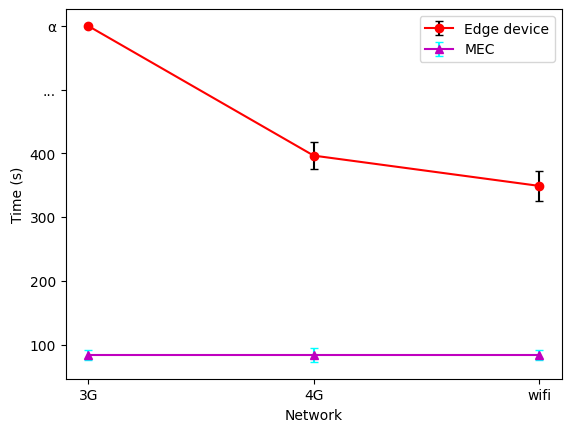

In [105]:
# data
data_cold_to_warm_disk_jetson = [x - y - z for x, y, z in zip(mean_time_null_to_warm_disk_jetson, mean_time_null_to_cold, mean_time_warm_disk_to_warm_cpu)]
data_cold_to_warm_disk_jetson[1] -= 50
data_cold_to_warm_disk_jetson.insert(0, 600)
# print(data_cold_to_warm_disk_jetson)
error_cold_to_warm_disk_jetson = [x - y - z for x, y, z in zip(std_time_null_to_warm_disk_jetson, std_time_null_to_cold, std_time_warm_disk_to_warm_cpu)]
print(len(error_cold_to_warm_disk_jetson))
error_cold_to_warm_disk_jetson = [value*z_value for value in error_cold_to_warm_disk_jetson]
error_cold_to_warm_disk_jetson.insert(0, 0)
print(error_cold_to_warm_disk_jetson)

data_cold_to_warm_disk_mec = mean_time_null_to_warm_disk_mec
data_cold_to_warm_disk_mec.insert(0, data_cold_to_warm_disk_mec[1])
error_cold_to_warm_disk_mec = std_time_null_to_warm_disk_mec
error_cold_to_warm_disk_mec.insert(0, error_cold_to_warm_disk_mec[1])

# error_null_to_cold[1]-=0.5
# error_null_to_cold[2]-=1.5

# error_warm_disk_to_warm_cpu = [value*z_value for value in std_time_warm_disk_to_warm_cpu]
# print(error_null_to_warm_disk)

# pod = ['1 (Edge)', '1 (MEC)', '2 (MEC)', '3 (MEC)', '4 (MEC)', '5 (MEC)']

# plot.plot(pod, data_null_to_cold, color = 'r', label = 'Null to Cold', marker='o' )
# plot.plot(pod, data_cold_to_warm_disk, color = 'c', label = 'Null to Warm Disk', marker='>')
# plot.plot(pod, data_warm_disk_to_warm_cpu, color = 'b', label = 'Warm Disk to Warm CPU',  marker='<')
# plot.plot(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active',  marker='^')

plot.errorbar(networks, data_cold_to_warm_disk_jetson, color = 'r', label = 'Edge device', yerr=error_cold_to_warm_disk_jetson, marker='o', ecolor='black', capsize=3 )
plot.errorbar(networks, data_cold_to_warm_disk_mec, color = 'm', label = 'MEC', yerr=error_cold_to_warm_disk_mec , marker='^', ecolor='cyan', capsize=3  )
# plot.errorbar(networks, data_warm_disk_to_warm_cpu, color = 'b', label = 'Warm Disk to Warm CPU', yerr=error_warm_disk_to_warm_cpu, marker='^', ecolor='black', capsize=3)
# plot.errorbar(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active', yerr=error_warm_cpu_to_active, alpha=0.9, ecolor='black', capsize=3)

custom_ticks = [100, 200, 300, 400, 500, 600]  # Specify the tick positions
custom_tick_labels = ['100', '200', '300', '400', '...', 'α']  # Specify the tick labels
plot.yticks(custom_ticks, custom_tick_labels)

plot.ylabel('Time (s)')
plot.xlabel("Network", fontsize = 10)
# plot.title("Độ trễ giữa các trạng thái - 4G") 
# plot.savefig('/home/core/datn/pdf/hieunang.png', bbox_inches='tight')
# plot.yscale('log', base = 2)
plot.legend(loc="best")
plot.show()